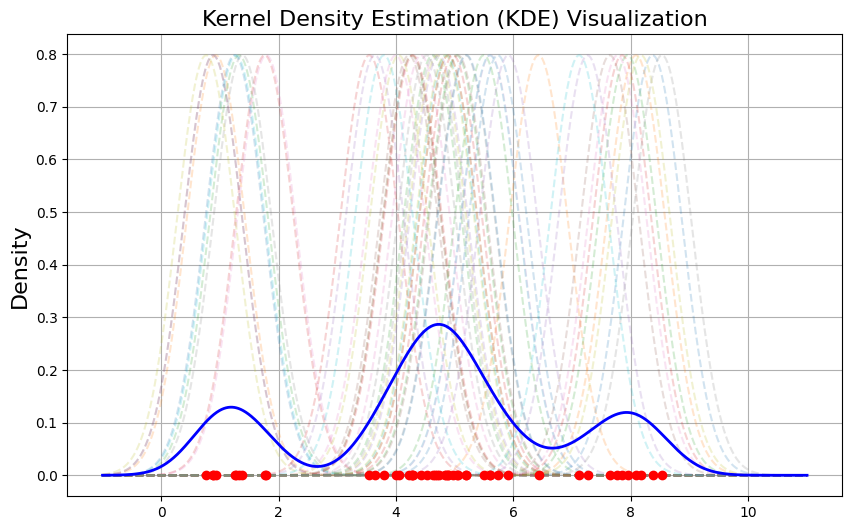

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 데이터 점 생성
np.random.seed(42)
data1 = np.random.normal(1, 0.5, size=10)
data2 = np.random.normal(4.5, 0.5, size=10)
data3 = np.random.normal(5, 0.5, size=10)
data4 = np.random.normal(5.5, 0.5, size=10)
data5 = np.random.normal(8, 0.5, size=10)
data = np.concatenate((data1, data2, data3, data4, data5))

# x축 범위 설정
x = np.linspace(-1, 11, 1000)

# 대역폭 설정
bandwidth = 0.5

# 개별 가우시안 커널을 계산하고 시각화
KDE = plt.figure(figsize=(10, 6))
kde_sum = np.zeros_like(x)

for point in data:
    kernel = norm.pdf(x, loc=point, scale=bandwidth)
    kde_sum += kernel
    plt.plot(x, kernel, '--', alpha=0.2, label=f'Kernel at {point:.2f}')

# 최종 KDE 밀도 함수 계산
kde_density = kde_sum / len(data)

# KDE 밀도 함수 시각화
plt.plot(x, kde_density, label='Final KDE Density', color='blue', linewidth=2)
plt.scatter(data, np.zeros_like(data), color='red', zorder=5, label='Data Points')
plt.title('Kernel Density Estimation (KDE) Visualization', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.grid()
plt.show()

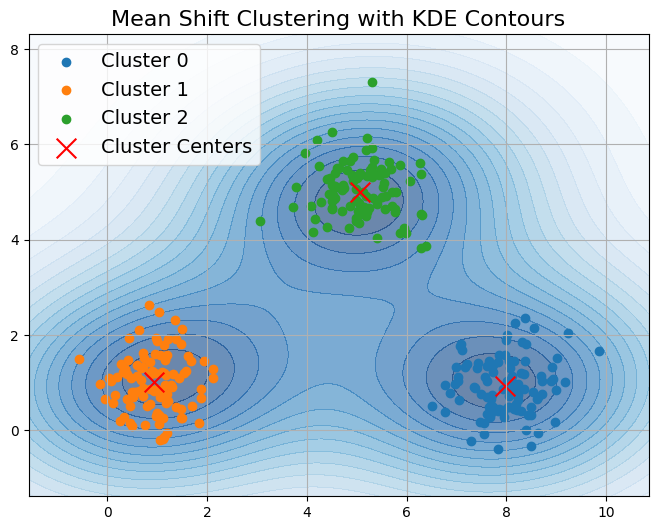

In [2]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Data Example
centers = [[1, 1], [5, 5], [8, 1]]  # 클러스터 중심
X, _ = make_blobs(n_samples=300, centers=centers, cluster_std=0.6, random_state=42)

# Bandwidth Estimation and Performing MeanShift
bandwidth = estimate_bandwidth(X, quantile=0.3, n_samples=100)
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(X)

# Finding the Cluster Centers
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

# Finding the Number of Clusters
n_clusters_ = len(np.unique(labels))

# Calculating KDE Contours
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
pos = np.vstack([xx.ravel(), yy.ravel()])

kde = gaussian_kde(X.T, bw_method=bandwidth / np.std(X))
zz = np.reshape(kde(pos), xx.shape)

# Visualization
MeanShift = plt.figure(figsize=(8, 6))

plt.contourf(xx, yy, zz, levels=20, cmap="Blues", alpha=0.6)

for k in range(n_clusters_):
    cluster_data = X[labels == k]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {k}")

plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    s=200,
    c='red',
    marker='x',
    label='Cluster Centers'
)

plt.title('Mean Shift Clustering with KDE Contours', fontsize=16)
plt.legend(fontsize=14)
plt.grid()
plt.show()
